# Table Of Content

*   Dataset Overview
*   Exploratory Data Analysis
*   Model Training
*   Validation Dataset Cleaning
*   Validation Dataset Prediction
*   Behaviour Score







# Dataset Overview


*   On-us Attributes (48 Columns): These variables, starting with onus_attributes, detail internal credit card account features like credit limits, offering insights into customer financial behavior and risk.
*   Transaction-Level Attributes (664 Columns): Variables prefixed with transaction_attribute summarize spending habits, including transaction counts and merchant categories, highlighting usage patterns and repayment potential.

*   Bureau Tradeline-Level Attributes (452 Columns): Starting with bureau, these attributes provide credit bureau data on historical accounts and delinquencies, aiding in assessing creditworthiness.
*   Bureau Enquiry-Level Attributes (50 Columns): Prefixed with bureau_enquiry, these capture customer inquiries to the credit bureau, signaling credit-seeking behavior or potential financial stress.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
df=pd.read_csv('/content/Dev_data_to_be_shared.csv')

# Explorartory Data Analysis

In [ ]:
df.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(96806, 1216)

## Null Dataframe

In [ ]:
df_null=df.isnull().sum()

In [ ]:
df_null.head()

,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231


In [ ]:
df_null.to_csv('null_values.csv')

## Nunique Dataframe

In [ ]:
df_nunique=df.nunique()

In [ ]:
df_nunique.head()

,0
account_number,96806
bad_flag,2
onus_attribute_1,970
transaction_attribute_1,84
transaction_attribute_2,8


In [ ]:
df_nunique.to_csv('nunique_values.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


In [ ]:
df.describe()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
count,96806.000000,96806.000000,7.157500e+04,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,...,94212.0,94212.000000,94212.000000,94212.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,48403.500000,0.014173,1.542391e+05,9.570769,0.002207,4.092854,77.306435,0.006315,67.043550,0.081034,...,0.0,0.189657,0.044283,7.800673,0.588114,1.497158,0.545650,1.430491,0.121447,0.119208
std,27945.629417,0.118203,1.729925e+05,1513.967595,0.119240,301.580599,3164.987013,0.129545,2516.330899,14.203615,...,0.0,0.597298,0.369451,8.655149,1.059613,1.702795,1.055865,1.728950,0.601256,0.599697
min,1.000000,0.000000,2.500000e+04,0.000000,0.000000,0.000000,-109800.476600,0.000000,-3498.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24202.250000,0.000000,5.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,48403.500000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,72604.750000,0.000000,1.810000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,11.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
max,96806.000000,1.000000,2.800000e+06,398936.791000,25.000000,55000.000000,358986.000000,12.000000,358986.000000,3150.000000,...,0.0,18.000000,14.000000,102.000000,19.000000,38.000000,19.000000,38.000000,15.000000,15.000000


## Data Cleaning

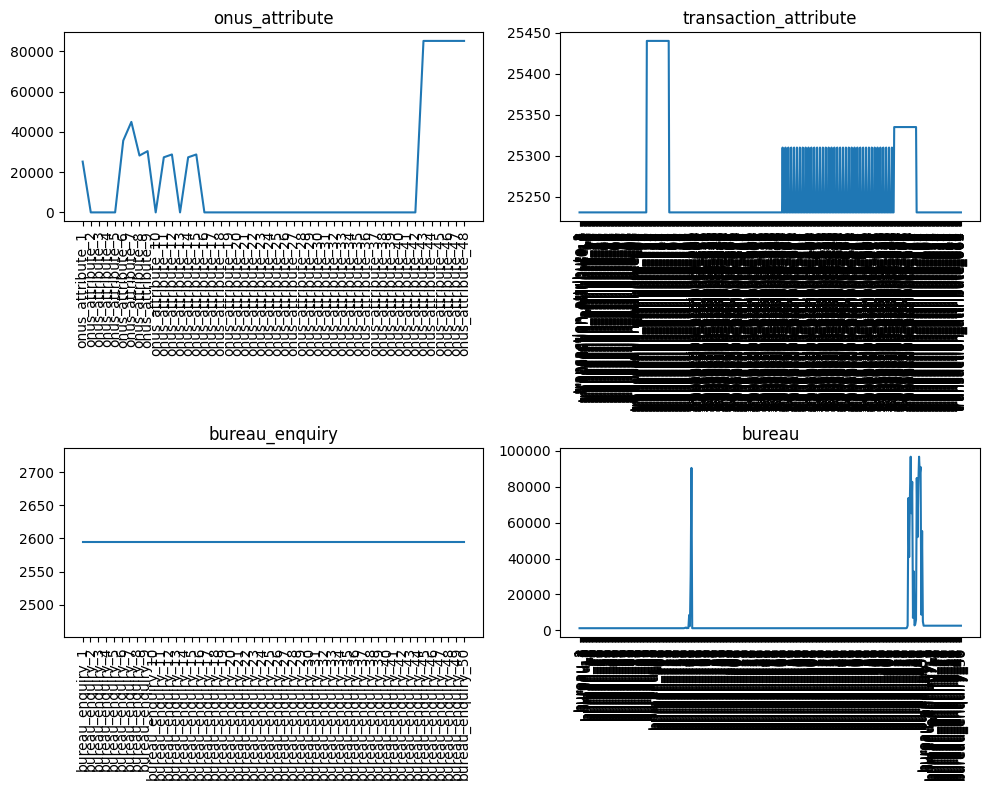

In [ ]:

# Define the four groups
onus_attribute = df_null[df_null.index.str.startswith('onus_attribute')]
transaction_attribute = df_null[df_null.index.str.startswith('transaction_attribute')]
bureau_enquiry = df_null[df_null.index.str.startswith('bureau_enquiry')]
bureau = df_null[df_null.index.str.startswith('bureau')]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].plot(onus_attribute.index, onus_attribute.values)
axes[0, 0].set_title('onus_attribute')
axes[0, 1].plot(transaction_attribute.index, transaction_attribute.values)
axes[0, 1].set_title('transaction_attribute')
axes[1, 0].plot(bureau_enquiry.index, bureau_enquiry.values)
axes[1, 0].set_title('bureau_enquiry')
axes[1, 1].plot(bureau.index, bureau.values)
axes[1, 1].set_title('bureau')
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

In [ ]:
threshold = len(df) * 0.3
columns_to_drop = df.columns[df.isnull().sum() > threshold]

In [ ]:
columns_to_drop

Index(['bureau_147', 'bureau_148', 'bureau_433', 'bureau_434', 'bureau_435',
       'bureau_436', 'bureau_437', 'bureau_438', 'bureau_440', 'bureau_444',
       'bureau_445', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449',
       'bureau_451', 'onus_attribute_6', 'onus_attribute_7',
       'onus_attribute_9', 'onus_attribute_43', 'onus_attribute_44',
       'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47',
       'onus_attribute_48'],
      dtype='object')

In [ ]:
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
remaining_columns = df.columns
df_null = df_null[df_null.index.isin(remaining_columns)]
df_nunique = df_nunique[df_nunique.index.isin(remaining_columns)]

In [ ]:
df.shape

(96806, 1191)

In [ ]:
df_null.shape

(1191,)

In [ ]:
df_nunique.head()

,0
account_number,96806
bad_flag,2
onus_attribute_1,970
transaction_attribute_1,84
transaction_attribute_2,8


In [ ]:
filtered_df_nunique = df_nunique[df_nunique == 1]
columns_with_one_unique_value = filtered_df_nunique.index

In [ ]:
columns_with_one_unique_value

Index(['transaction_attribute_152', 'transaction_attribute_191',
       'transaction_attribute_524', 'transaction_attribute_525',
       'transaction_attribute_582', 'transaction_attribute_621', 'bureau_4',
       'bureau_16', 'bureau_26', 'bureau_38', 'bureau_47', 'bureau_56',
       'bureau_70', 'bureau_80', 'bureau_90', 'bureau_100', 'bureau_110',
       'bureau_120', 'bureau_131', 'bureau_142', 'bureau_152', 'bureau_162',
       'bureau_172', 'bureau_182', 'bureau_192', 'bureau_202', 'bureau_212',
       'bureau_222', 'bureau_232', 'bureau_242', 'bureau_252', 'bureau_262',
       'bureau_272', 'bureau_282', 'bureau_292', 'bureau_302', 'bureau_312',
       'bureau_322', 'bureau_332', 'bureau_342', 'bureau_352', 'bureau_362',
       'bureau_372', 'bureau_382', 'bureau_392', 'bureau_402', 'bureau_412',
       'bureau_423', 'onus_attribute_28', 'bureau_enquiry_7',
       'bureau_enquiry_17', 'bureau_enquiry_27', 'bureau_enquiry_37',
       'bureau_enquiry_47'],
      dtype='object')

In [ ]:
df = df.drop(columns=columns_with_one_unique_value, axis=1)

In [ ]:
remaining_columns = df.columns
df_null = df_null[df_null.index.isin(remaining_columns)]
df_nunique = df_nunique[df_nunique.index.isin(remaining_columns)]

In [ ]:
df.shape

(96806, 1137)

In [ ]:
df_null.shape

(1137,)

In [ ]:
total_columns_to_drop = columns_with_one_unique_value.union(columns_to_drop)

In [ ]:
total_columns_to_drop.shape

(79,)

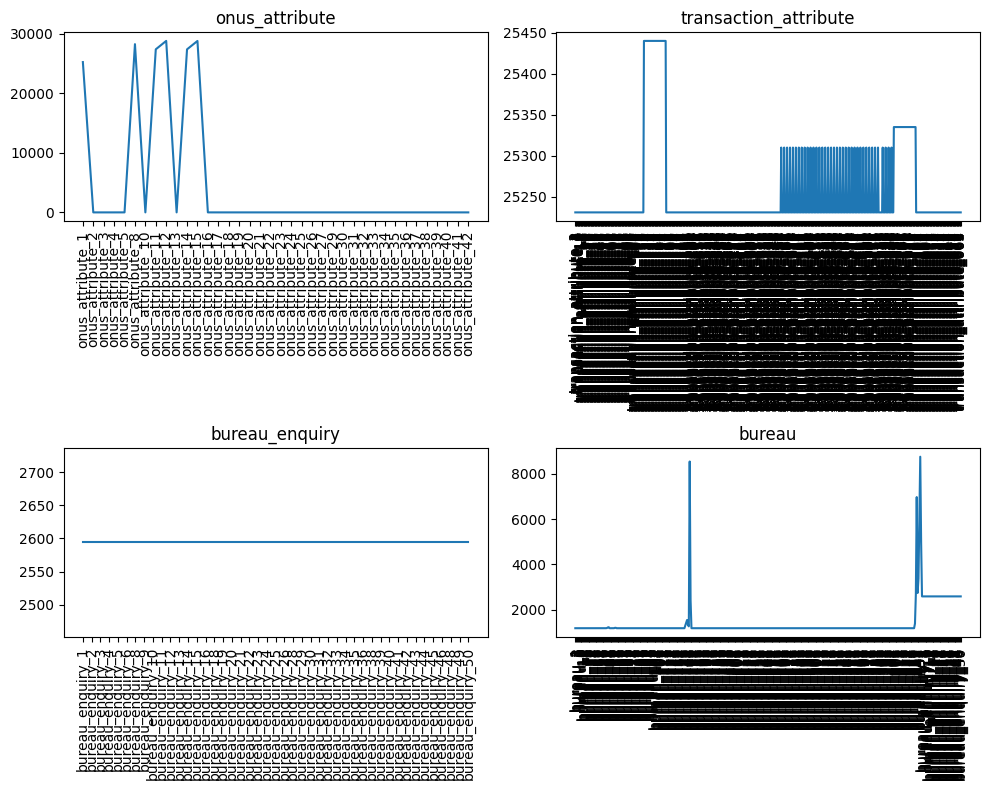

In [ ]:
onus_attribute = df_null[df_null.index.str.startswith('onus_attribute')]
transaction_attribute = df_null[df_null.index.str.startswith('transaction_attribute')]
bureau_enquiry = df_null[df_null.index.str.startswith('bureau_enquiry')]
bureau = df_null[df_null.index.str.startswith('bureau')]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(onus_attribute.index, onus_attribute.values)
axes[0, 0].set_title('onus_attribute')
axes[0, 1].plot(transaction_attribute.index, transaction_attribute.values)
axes[0, 1].set_title('transaction_attribute')
axes[1, 0].plot(bureau_enquiry.index, bureau_enquiry.values)
axes[1, 0].set_title('bureau_enquiry')
axes[1, 1].plot(bureau.index, bureau.values)
axes[1, 1].set_title('bureau')
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_null.head()

,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231


In [ ]:
#now finding binary and non binary

In [ ]:
binary_df_nunique = df_nunique[df_nunique == 2]
columns_with_binary_value = binary_df_nunique.index

In [ ]:
columns_with_binary_value

Index(['bad_flag', 'transaction_attribute_79', 'transaction_attribute_80',
       'transaction_attribute_81', 'transaction_attribute_144',
       'transaction_attribute_183', 'transaction_attribute_222', 'bureau_67',
       'bureau_149', 'bureau_150',
       ...
       'bureau_385', 'bureau_386', 'bureau_387', 'bureau_388',
       'onus_attribute_3', 'onus_attribute_4', 'onus_attribute_26',
       'onus_attribute_27', 'onus_attribute_29', 'onus_attribute_30'],
      dtype='object', length=230)

In [ ]:
binary_df_nunique.shape

(230,)

In [ ]:
#get the cat column - code threshold nunique <=10

In [ ]:
def get_categorical_cols(df, range_threshold):
    categorical_cols = []
    for col in df.columns:
        nunique = df[col].nunique()
        max_val = df[col].max()

        if nunique == max_val + 1 and nunique <= range_threshold:
            categorical_cols.append(col)

    return categorical_cols


# Example usage:
categorical_columns = get_categorical_cols(df, range_threshold=25)
print(categorical_columns)

['bad_flag', 'transaction_attribute_80', 'transaction_attribute_144', 'transaction_attribute_183', 'transaction_attribute_314', 'bureau_5', 'bureau_15', 'bureau_17', 'bureau_25', 'bureau_27', 'bureau_67', 'bureau_69', 'bureau_71', 'bureau_73', 'bureau_77', 'bureau_79', 'bureau_81', 'bureau_83', 'bureau_84', 'bureau_87', 'bureau_89', 'bureau_93', 'bureau_97', 'bureau_101', 'bureau_113', 'bureau_149', 'bureau_150', 'bureau_151', 'bureau_153', 'bureau_154', 'bureau_155', 'bureau_156', 'bureau_157', 'bureau_158', 'bureau_159', 'bureau_160', 'bureau_161', 'bureau_163', 'bureau_164', 'bureau_165', 'bureau_166', 'bureau_167', 'bureau_168', 'bureau_169', 'bureau_170', 'bureau_171', 'bureau_173', 'bureau_174', 'bureau_175', 'bureau_176', 'bureau_177', 'bureau_178', 'bureau_179', 'bureau_180', 'bureau_181', 'bureau_183', 'bureau_184', 'bureau_185', 'bureau_186', 'bureau_187', 'bureau_188', 'bureau_189', 'bureau_190', 'bureau_191', 'bureau_193', 'bureau_194', 'bureau_195', 'bureau_196', 'bureau_1

In [ ]:
len(categorical_columns)

271

In [ ]:
columns_with_binary_value.shape

(230,)

In [ ]:


def get_categorical_cols_df(df, range_threshold):
    categorical_data = []
    for col in df.columns:
        nunique = df[col].nunique()
        max_val = df[col].max()

        if nunique == max_val + 1 and nunique <= range_threshold:
            categorical_data.append([col, nunique])  # Append column name and nunique

    # Create DataFrame
    categorical_df = pd.DataFrame(categorical_data, columns=['Categorical Column', 'Nunique'])

    return categorical_df

# Example usage:
categorical_df = get_categorical_cols_df(df, range_threshold=25)
print(categorical_df)

            Categorical Column  Nunique
0                     bad_flag        2
1     transaction_attribute_80        2
2    transaction_attribute_144        2
3    transaction_attribute_183        2
4    transaction_attribute_314        5
..                         ...      ...
266          bureau_enquiry_29        9
267          bureau_enquiry_34       16
268          bureau_enquiry_38       10
269          bureau_enquiry_39       13
270          bureau_enquiry_49       15

[271 rows x 2 columns]


In [ ]:
categorical_df['Nunique'].value_counts()

,count
Nunique,
2,227
7,10
4,7
3,5
9,4
5,3
6,3
16,2
8,2


## Imputing Null Values

In [ ]:
for column in df.columns:
    if column in categorical_columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

In [ ]:
df.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_40,bureau_enquiry_41,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,1,0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,2.0,4.0,0.0,1.0,0.0,0.0,2.0,3.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,11.0,0.0,11.0,0.0,2.0,0.0,0.0,0.0,8.0
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,38.0,0.0,38.0,0.0,6.0,0.0,0.0,0.0,30.0
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.shape

(96806, 1137)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#df.to_csv('cleaned_data.csv', index=False)

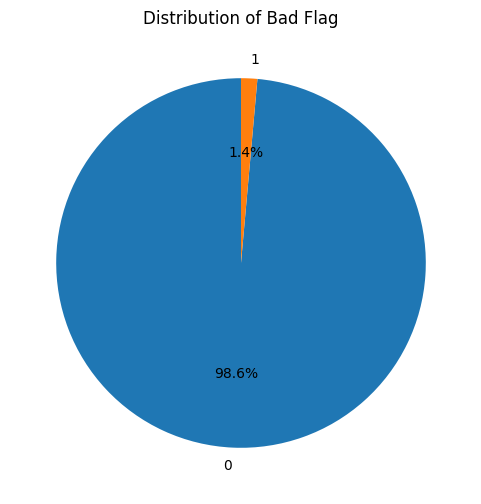

In [ ]:


# Get the counts of each category in the 'bad_flag' column
bad_flag_counts = df['bad_flag'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(bad_flag_counts, labels=bad_flag_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bad Flag')
plt.show()

In [ ]:
bad_flag_counts = df['bad_flag'].value_counts()
print(bad_flag_counts)

bad_flag
0    95434
1     1372
Name: count, dtype: int64


In [ ]:
df.shape

(96806, 1137)

In [ ]:
len(categorical_columns)

271

In [ ]:
# Assuming 'categorical_columns' is your list of categorical columns and 'df' is your DataFrame
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
print(non_categorical_columns)

['account_number', 'onus_attribute_1', 'transaction_attribute_1', 'transaction_attribute_2', 'transaction_attribute_3', 'transaction_attribute_4', 'transaction_attribute_5', 'transaction_attribute_6', 'transaction_attribute_7', 'transaction_attribute_8', 'transaction_attribute_9', 'transaction_attribute_10', 'transaction_attribute_11', 'transaction_attribute_12', 'transaction_attribute_13', 'transaction_attribute_14', 'transaction_attribute_15', 'transaction_attribute_16', 'transaction_attribute_17', 'transaction_attribute_18', 'transaction_attribute_19', 'transaction_attribute_20', 'transaction_attribute_21', 'transaction_attribute_22', 'transaction_attribute_23', 'transaction_attribute_24', 'transaction_attribute_25', 'transaction_attribute_26', 'transaction_attribute_27', 'transaction_attribute_28', 'transaction_attribute_29', 'transaction_attribute_30', 'transaction_attribute_31', 'transaction_attribute_32', 'transaction_attribute_33', 'transaction_attribute_34', 'transaction_attri

In [ ]:
len(non_categorical_columns)

866

In [ ]:
# Remove 'bad_flag' from categorical_columns
categorical_columns = [col for col in categorical_columns if col not in ['bad_flag']]
# Remove 'acc_no' from non-categorical_columns
non_categorical_columns = [col for col in non_categorical_columns if col not in ['account_number']]

In [ ]:
len(categorical_columns)

270

In [ ]:
len(non_categorical_columns)

865

In [ ]:
df.columns

Index(['account_number', 'bad_flag', 'onus_attribute_1',
       'transaction_attribute_1', 'transaction_attribute_2',
       'transaction_attribute_3', 'transaction_attribute_4',
       'transaction_attribute_5', 'transaction_attribute_6',
       'transaction_attribute_7',
       ...
       'bureau_enquiry_40', 'bureau_enquiry_41', 'bureau_enquiry_42',
       'bureau_enquiry_43', 'bureau_enquiry_44', 'bureau_enquiry_45',
       'bureau_enquiry_46', 'bureau_enquiry_48', 'bureau_enquiry_49',
       'bureau_enquiry_50'],
      dtype='object', length=1137)

# Model Training

In [ ]:

X = df.drop(columns=['account_number','bad_flag'])
y = df['bad_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


## LightGBM






In [ ]:

model = lgb.LGBMClassifier(class_weight={0: 1, 1: 15}, random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")
pr_auc = average_precision_score(y_test, y_pred_prob)
print(f"PR AUC: {pr_auc:.4f}")
y_pred = (y_pred_prob >= 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 823, number of negative: 57260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.745780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140446
[LightGBM] [Info] Number of data points in the train set: 58083, number of used features: 1101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.177358 -> initscore=-1.534351
[LightGBM] [Info] Start training from score -1.534351
ROC AUC: 0.8177
PR AUC: 0.0740

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     38174
           1       0.13      0.11      0.12       549

    accuracy                           0.98     38723
   macro avg       0.56      0.55      0.55     38723
weighted avg       0.98      0.98      0.98     38723



In [ ]:

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[37788   386]
 [  490    59]]


In [ ]:
importance_df.head(20)

,Feature,Importance
1053,onus_attribute_2,66
1056,onus_attribute_5,39
1052,bureau_452,35
711,bureau_59,32
1040,bureau_426,30
1057,onus_attribute_8,29
1051,bureau_450,28
704,bureau_51,25
1030,bureau_415,23
543,transaction_attribute_547,23


## Ensemble LightGBM XGBoost CatBoost

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(class_weight={0: 1, 1: 15}, random_state=42)
lgb_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=15, random_state=42)
xgb_model.fit(X_train, y_train)

# Train CatBoost model
catboost_model = CatBoostClassifier(class_weights=[1, 15], random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# --- Ensemble Predictions ---
lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
catboost_pred = catboost_model.predict_proba(X_test)[:, 1]

# Simple Averaging Ensemble
ensemble_pred = (lgb_pred + xgb_pred + catboost_pred) / 3

# --- Evaluation ---
roc_auc = roc_auc_score(y_test, ensemble_pred)
print(f"Ensemble ROC AUC: {roc_auc:.4f}")

pr_auc = average_precision_score(y_test, ensemble_pred)
print(f"Ensemble PR AUC: {pr_auc:.4f}")

y_pred = (ensemble_pred >= 0.5).astype(int)  # Convert probabilities to class labels
print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 823, number of negative: 57260
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.845092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140446
[LightGBM] [Info] Number of data points in the train set: 58083, number of used features: 1101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.177358 -> initscore=-1.534351
[LightGBM] [Info] Start training from score -1.534351
Ensemble ROC AUC: 0.8024
Ensemble PR AUC: 0.0582

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     38174
           1       0.11      0.07      0.08       549

    accuracy                           0.98     38723
   macro avg       0.55      0.53      0.54     38723
weighted avg       0.97      0.98      0.98     38723



In [ ]:



def evaluate_model(model_name, y_true, y_pred_prob):
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    pr_auc = average_precision_score(y_true, y_pred_prob)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    report = classification_report(y_true, y_pred)

    print(f"--- {model_name} ---")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print("Classification Report:\n", report)
    print("-" * 20)

# --- Evaluate Each Model (using existing predictions) ---
evaluate_model("LightGBM", y_test, lgb_pred)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("CatBoost", y_test, catboost_pred)

--- LightGBM ---
ROC AUC: 0.8177
PR AUC: 0.0740
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     38174
           1       0.13      0.11      0.12       549

    accuracy                           0.98     38723
   macro avg       0.56      0.55      0.55     38723
weighted avg       0.98      0.98      0.98     38723

--------------------
--- XGBoost ---
ROC AUC: 0.7311
PR AUC: 0.0392
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     38174
           1       0.06      0.10      0.08       549

    accuracy                           0.96     38723
   macro avg       0.52      0.54      0.53     38723
weighted avg       0.97      0.96      0.97     38723

--------------------
--- CatBoost ---
ROC AUC: 0.7695
PR AUC: 0.0529
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99 

In [ ]:
df['bad_flag'].value_counts()

,count
bad_flag,
0,95434
1,1372


## Grouped Resampling (5 LightGBM Ensemble)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [ ]:




# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Create 5 i.i.d. samples using StratifiedKFold
num_samples = 5
skf = StratifiedKFold(n_splits=num_samples, shuffle=True, random_state=42)

models = []
predictions = []

for fold, (train_index, _) in enumerate(skf.split(X_train, y_train)):

    X_sample = X_train.iloc[train_index]
    y_sample = y_train.iloc[train_index]


    X_sample = pd.concat([X_sample, X_train.loc[y_train[y_train == 1].index]])
    y_sample = pd.concat([y_sample, y_train[y_train == 1]])


    model = lgb.LGBMClassifier(class_weight={0: 1, 1: 10}, random_state=42)
    model.fit(X_sample, y_sample)
    models.append(model)


    y_pred_prob = model.predict_proba(X_test)[:, 1]
    predictions.append(y_pred_prob)

# Ensemble predictions (simple averaging)
ensemble_predictions = np.mean(predictions, axis=0)

# Evaluate ensemble predictions
roc_auc = roc_auc_score(y_test, ensemble_predictions)
print(f"Ensemble ROC AUC: {roc_auc:.4f}")

pr_auc = average_precision_score(y_test, ensemble_predictions)
print(f"Ensemble PR AUC: {pr_auc:.4f}")

# Generate classification report (using a threshold of 0.5)
y_pred = (ensemble_predictions >= 0.5).astype(int)
print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1728, number of negative: 53443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.011888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139991
[LightGBM] [Info] Number of data points in the train set: 55171, number of used features: 1100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244334 -> initscore=-1.129066
[LightGBM] [Info] Start training from score -1.129066
[LightGBM] [Info] Number of positive: 1728, number of negative: 53443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.405114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139653
[LightGBM] [Info] Number of data points in the train set: 55171, number of used features: 1101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244334 -> initscore=-1.129066
[LightGBM] [Info] Start training from score -1.129066
[Light

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[28087   543]
 [  335    77]]


# Validation Data Cleaning

In [ ]:
validation_df=pd.read_csv('/content/validation_data_to_be_shared.csv')

In [ ]:
total_columns_to_drop

Index(['bureau_100', 'bureau_110', 'bureau_120', 'bureau_131', 'bureau_142',
       'bureau_147', 'bureau_148', 'bureau_152', 'bureau_16', 'bureau_162',
       'bureau_172', 'bureau_182', 'bureau_192', 'bureau_202', 'bureau_212',
       'bureau_222', 'bureau_232', 'bureau_242', 'bureau_252', 'bureau_26',
       'bureau_262', 'bureau_272', 'bureau_282', 'bureau_292', 'bureau_302',
       'bureau_312', 'bureau_322', 'bureau_332', 'bureau_342', 'bureau_352',
       'bureau_362', 'bureau_372', 'bureau_38', 'bureau_382', 'bureau_392',
       'bureau_4', 'bureau_402', 'bureau_412', 'bureau_423', 'bureau_433',
       'bureau_434', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438',
       'bureau_440', 'bureau_444', 'bureau_445', 'bureau_446', 'bureau_447',
       'bureau_448', 'bureau_449', 'bureau_451', 'bureau_47', 'bureau_56',
       'bureau_70', 'bureau_80', 'bureau_90', 'bureau_enquiry_17',
       'bureau_enquiry_27', 'bureau_enquiry_37', 'bureau_enquiry_47',
       'bureau_enquiry_

In [ ]:
validation_df = validation_df.drop(columns=total_columns_to_drop, axis=1)

In [ ]:
len(categorical_columns)

270

In [ ]:
for column in validation_df.columns:
    if column in categorical_columns:
        validation_df[column] = validation_df[column].fillna(validation_df[column].mode()[0]) # Fill with mode for categorical columns
    else:
        validation_df[column] = validation_df[column].fillna(validation_df[column].median()) # Fill with median for others

In [ ]:
validation_df.isnull().sum().sum()

0

In [ ]:
validation_df.head()

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_40,bureau_enquiry_41,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,51.0,1.0,50.0,0.0,10.0,0.0,0.0,0.0,32.0
1,100002,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,2.0,14.0,0.0,1.0,0.0,2.0,0.0,12.0
3,100004,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,29.0,0.0,29.0,0.0,2.0,0.0,0.0,0.0,18.0


In [ ]:


df_columns = df.drop(columns=['account_number', 'bad_flag']).columns
validation_df_columns = validation_df.drop(columns=['account_number']).columns

columns_match = df_columns.equals(validation_df_columns)

print(f"Column order matches: {columns_match}")

Column order matches: True


# Validation Data Prediction

In [ ]:
validation_df['predicted_prob'] = model.predict_proba(validation_df.drop(columns=['account_number']))[:, 1]


final_predictions = validation_df[['account_number', 'predicted_prob']]

<ipython-input-231-c1dcf47cb8fd>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  validation_df['predicted_prob'] = model.predict_proba(validation_df.drop(columns=['account_number']))[:, 1]


In [ ]:
validation_predictions = []
for model in models:
    y_pred_prob = model.predict_proba(validation_df.drop(columns=['account_number']))[:, 1]
    validation_predictions.append(y_pred_prob)

ensemble_validation_predictions = np.mean(validation_predictions, axis=0)

validation_df['predicted_prob'] = ensemble_validation_predictions

<ipython-input-94-6fe5971d5a15>:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
validation_df.head()

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_41,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,predicted_prob
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,1.0,50.0,0.0,10.0,0.0,0.0,0.0,32.0,0.148702
1,100002,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012536
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,14.0,0.0,1.0,0.0,2.0,0.0,12.0,0.010198
3,100004,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.012330
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,29.0,0.0,2.0,0.0,0.0,0.0,18.0,0.158764


In [ ]:
final_predictions = validation_df[['account_number', 'predicted_prob']]

final_predictions.head()

,account_number,predicted_prob
0,100001,0.148702
1,100002,0.012536
2,100003,0.010198
3,100004,0.012330
4,100005,0.158764


In [ ]:
final_predictions.shape

(41792, 2)

In [ ]:

num_accounts_above_threshold = len(final_predictions[final_predictions['predicted_prob'] >= 0.5])

print(f"Number of accounts with probability >= 0.5: {num_accounts_above_threshold}")

Number of accounts with probability >= 0.5: 1050


In [ ]:
validation_df.shape

(41792, 1137)

# Behaviour Score

**Behavior Score Interpretation**


*   The Behavior Score is a creditworthiness metric calculated using the formula:
*   Behavior Score = (1 - Predicted Probability of Default) × 100.
*   It ranges from 0 to 100, where a higher score indicates lower default risk and better customer behavior.
*   100: Best behavior, minimal default risk.
*   0: Worst behavior, high default risk.




In [ ]:
behavior_score = validation_df[['account_number']].copy()
behavior_score['behavior_score'] = (1 - validation_df['predicted_prob']) * 100


In [ ]:
behavior_score.head()

,account_number,behavior_score
0,100001,85.129777
1,100002,98.746376
2,100003,98.980152
3,100004,98.766968
4,100005,84.123598


In [ ]:
#behavior_score.to_csv('behavior_score.csv', index=False)